# SUFC Summary

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import os
sys.path.append('..')
from wyscout.team import get_team_squad, get_player_stats
from dotenv import load_dotenv
from wyscout.api import set_auth
load_dotenv()
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import math

ImportError: cannot import name 'set_auth' from 'wyscout.api' (/workspaces/sufc_stats/notebooks/../wyscout/api/__init__.py)

In [3]:
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
set_auth(CLIENT_ID, CLIENT_SECRET)

In [4]:
SOUTHEND = 1687
NATIONAL_LEAGUE = 351
STD_SEASON = 4426995
SEASON_2022 = 188172

In [5]:
squad = get_team_squad(SOUTHEND, SEASON_2022)

In [ ]:
player_stats = []
for player in squad["squad"]:
    player_data = get_player_stats(player["wyId"], SEASON_2022, NATIONAL_LEAGUE, STD_SEASON)
    player_stats.append({
        "player": player,
        "stats": player_data
    })

In [21]:
filtered_players = [p for p in player_stats if p["stats"]["total"]["matches"] > 0]

In [22]:
sorted_players = sorted(filtered_players, key=lambda d: d["stats"]["total"]["matches"], reverse=True) 

In [23]:
[p["player"]["shortName"] for p in sorted_players] 

['O. Kensdale',
 'S. Hobson',
 'C. Miley',
 'W. Fonguck',
 'C. Powell',
 'C. Wreh',
 'J. Bridge',
 'C. Andeng Ndi',
 'G. Scott-Morriss',
 'D. Mooney',
 'K. Łopata',
 'Noor Husin',
 'J. Hyde',
 'A. Cosgrave',
 'J. Demetriou',
 'L. Lomas',
 'N. Ralph',
 'H. Taylor',
 'M. Dackers',
 'T. Clifford',
 'O. Coker',
 'S. Arnold',
 'J. Crowhurst',
 'R. Murphy',
 'H. Cardwell',
 'B. Noukeu',
 'J. Benton',
 'J. Wood',
 'T. Adedoja']

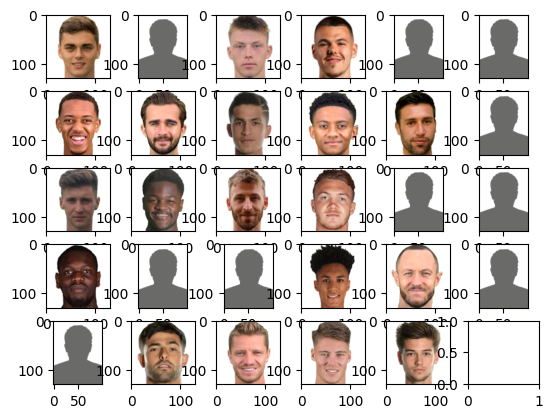

In [24]:
cols = 5
player_count = len(sorted_players)

f, axarr = plt.subplots(cols,math.ceil(player_count / cols))

row = 0
col = 0

for p in sorted_players:
    response = requests.get(p["player"]["imageDataURL"])
    img = Image.open(BytesIO(response.content))
    axarr[col, row].imshow(img)
    if col < cols - 1:
        col += 1
    else:
        col = 0
        row += 1

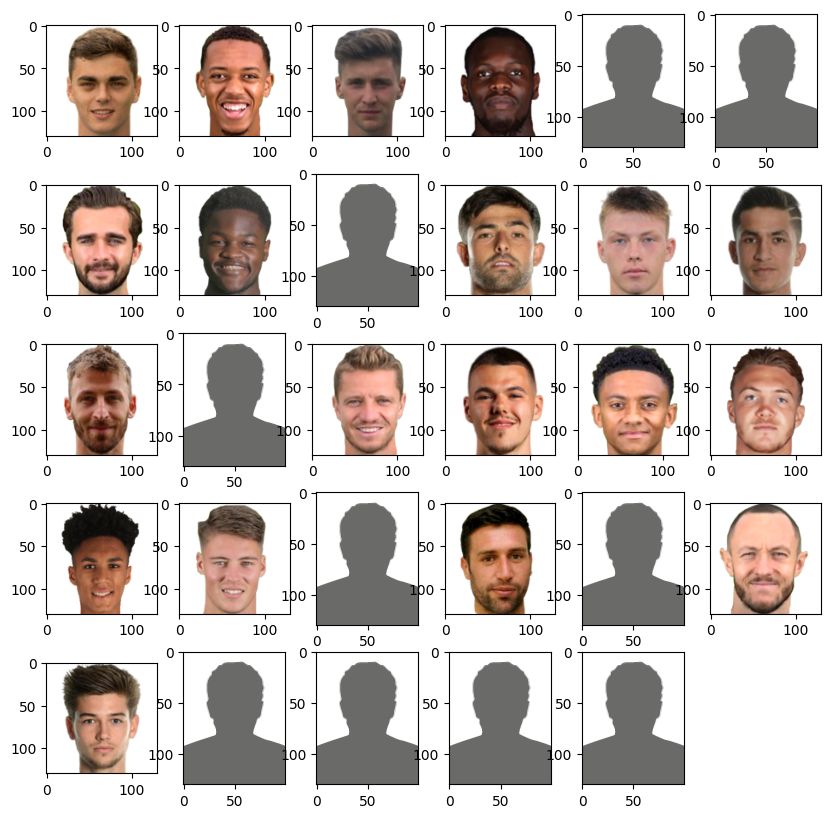

In [25]:
plt.figure(figsize=(10,10)) 

for i, p in enumerate(sorted_players):
    response = requests.get(p["player"]["imageDataURL"])
    img = Image.open(BytesIO(response.content))
    plt.subplot(cols,math.ceil(player_count / cols),i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(img)